In [1]:
from mpl_toolkits.basemap import Basemap
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from typing import List

## Task 1: Read the CSV files containing the airline delay data into a single DataFrame.  Then display the total number of rows imported.

In [2]:
df = pd.concat(
    map(pd.read_csv, ['delays_2018.csv', 'delays_2019.csv']), ignore_index=True
)

In [3]:
no_of_rows = len(df.index)
print('Number of rows when first imported: ' + str(no_of_rows))

Number of rows when first imported: 41177


## Task 2: Change the *date* column to date format YYYY-M (e.g. 2018-1).  Then perform exploratory data analysis on the imported dataset to identify invalid data - write code to remove the impacted rows. Finally, display the number of rows remaining.

### First, let's perform the validation, so that we can figure out if there is any nonsense (in date as well, before we attempt to change data type).

In [4]:
def filter_df_by_regex(df, pattern, field_name, orig_no_of_rows):
    new_df = df[df[field_name].apply(lambda x: bool(pattern.match(x)))]
    # let's see if anything was filtered out (orig. number of rows
    new_no_of_rows = len(new_df.index)
    print('Number of rows before filtering: ' + str(orig_no_of_rows))
    print('Number of rows after filtering: ' + str(new_no_of_rows))
    return new_df, new_no_of_rows

In [5]:
# conditions for `date`:
# not None/NaN
# year is 2018 or 2019, month is 1-12

field = 'date'
df[field].fillna('', inplace=True)
pattern = re.compile(r'^(2018-[1-9]|2018-1[0-2]|2019-[1-9]|2019-1[0-2])$')
df, no_of_rows = filter_df_by_regex(df=df, pattern=pattern, field_name=field, orig_no_of_rows=no_of_rows)

Number of rows before filtering: 41177
Number of rows after filtering: 41157


In [6]:
# `carrier`:
# not None/NaN
# has 2 characters (letters)

# we need to replace NaN with '' to prevent errors when evaluating field
field = 'carrier'
df[field].fillna('', inplace=True)
pattern = re.compile(r'^\w\w$')
df, no_of_rows = filter_df_by_regex(df=df, pattern=pattern, field_name=field, orig_no_of_rows=no_of_rows)

Number of rows before filtering: 41157
Number of rows after filtering: 41127


In [7]:
# `airport`:
# - has 3 characters
# - not None/NaN

field = 'airport'
df[field].fillna('', inplace=True)
pattern = re.compile(r'^\w\w\w$')
df, no_of_rows = filter_df_by_regex(df=df, pattern=pattern, field_name=field, orig_no_of_rows=no_of_rows)

Number of rows before filtering: 41127
Number of rows after filtering: 41108


In [8]:
# `airport_name`:
# - is a string of any characters (can include .,/ etc.)
# - not None/NaN

field = 'airport'
df[field].fillna('', inplace=True)
pattern = re.compile(r'^..*$')
df, no_of_rows = filter_df_by_regex(df=df, pattern=pattern, field_name=field, orig_no_of_rows=no_of_rows)

Number of rows before filtering: 41108
Number of rows after filtering: 41108


In [9]:
# `arr_flights`:
# not NaN (if empty, we assume there were no flights, so we replace by 0)

df['arr_flights'].fillna(0, inplace=True)

In [10]:
# `arr_del15`:
# - not NaN (if so, we assume there were no flights, so we replace by 0)
# - smaller than or equal to `arr_flights`

df['arr_del15'].fillna(0, inplace=True)
df.query("arr_del15 <= arr_flights", inplace=True)

In [11]:
# `carrier_ct`:
# - smaller than or equal to arr_del15
# - not NaN (if so, we assume there were no flights, so we replace by 0)

df['carrier_ct'].fillna(0, inplace=True)
df.query("carrier_ct <= arr_del15", inplace=True)

In [12]:
# `weather_ct`:
# - smaller than or equal to arr_del15
# - not NaN (if so, we assume there were no flights, so we replace by 0)

df['weather_ct'].fillna(0, inplace=True)
df.query("weather_ct <= arr_del15", inplace=True)

In [13]:
# `nas_ct`:
# - smaller than or equal to arr_del15
# - not NaN (if so, we assume there were no flights, so we replace by 0)

df['nas_ct'].fillna(0, inplace=True)
df.query("nas_ct <= arr_del15", inplace=True)

In [14]:
# `security_ct`:
# - smaller than or equal to arr_del15
# - not NaN (if so, we assume there were no flights, so we replace by 0)

df['security_ct'].fillna(0, inplace=True)
df.query("security_ct <= arr_del15", inplace=True)

In [15]:
# `late_aircraft_ct`:
# - smaller than or equal to arr_del15
# - not NaN (if so, we assume there were no flights, so we replace by 0)

df['late_aircraft_ct'].fillna(0, inplace=True)
df.query("late_aircraft_ct <= arr_del15", inplace=True)

In [16]:
# `arr_cancelled`:
# - not NaN (if so, we assume there were no flights, so we replace by 0)

df['arr_cancelled'].fillna(0, inplace=True)

In [17]:
# `arr_diverted`:
# - not NaN (if so, we assume there were no flights, so we replace by 0)

df['arr_diverted'].fillna(0, inplace=True)

In [18]:
# `arr_delay`:
# - not NaN (if so, replace by 0)
# - bigger than or equal to `arr_del15` * 15

df['arr_delay'].fillna(0, inplace=True)
df.query("arr_delay >= arr_del15 * 15", inplace=True)

In [19]:
# `carrier_delay`:
# - smaller than or equal to `arr_delay`
# - bigger than or equal to `carrier_ct` * 15
# - also not NaN (if so, replace by 0)

df['carrier_delay'].fillna(0, inplace=True)
df.query("carrier_delay >= carrier_ct * 15", inplace=True)
df.query("carrier_delay <= arr_delay", inplace=True)


In [20]:
# `weather_delay`:
# - not NaN (if so, replace by 0)
# - smaller than or equal to `arr_delay`
# - bigger than or equal to `weather_ct` * 15

df['weather_delay'].fillna(0, inplace=True)
df.query("weather_delay >= weather_ct * 15", inplace=True)
df.query("weather_delay <= arr_delay", inplace=True)

In [21]:
# `nas_delay`:
# - not NaN (if so, replace by 0)
# - smaller than or equal to `arr_delay`
# - bigger than or equal to `nas_ct` * 15

df['nas_delay'].fillna(0, inplace=True)
df.query("nas_delay >= nas_ct * 15", inplace=True)
df.query("nas_delay <= arr_delay", inplace=True)

In [22]:
# `security_delay`:
# - not NaN (if so, replace by 0)
# - smaller than or equal to `arr_delay`
# - bigger than or equal to `security_ct` * 15

df['security_delay'].fillna(0, inplace=True)
df.query("security_delay >= security_ct * 15", inplace=True)
df.query("security_delay <= arr_delay", inplace=True)

In [23]:
# `late_aircraft_delay`:
# - not NaN (if so, replace by 0)
# - smaller than or equal to `arr_delay`
# - bigger than or equal to `late_aircraft_ct` * 15

df['late_aircraft_delay'].fillna(0, inplace=True)
df.query("late_aircraft_delay >= late_aircraft_ct * 15", inplace=True)
df.query("late_aircraft_delay <= arr_delay", inplace=True)

### We can now assume that the `date` column is now cleaned up so there should be no problem going further. Let's change it to datetime64 and put it into a new column (just in case we need to work with it as a datetime64 dtype).

In [24]:
# we append 01 as day, as we don't have information about days here
df['date_as_datetime'] = pd.to_datetime(df['date'] + '-01', format='%Y-%m-%d')

## Task 3: Display a list of all Tennessee airports that appear in the dataset

In [25]:
# we are looking for "TN:" string within airport_name, then we filter out duplicates and transform it into a list
df[df.airport_name.str.contains("TN:")]['airport_name'].drop_duplicates().to_list()

['Nashville, TN: Nashville International',
 'Memphis, TN: Memphis International',
 'Chattanooga, TN: Lovell Field',
 'Knoxville, TN: McGhee Tyson',
 'Bristol/Johnson City/Kingsport, TN: Tri Cities']

## Task 4: Import the coordinates dataset and merge it with the existing dataset. Plot the coordinates of all airports on a map (hint: use Matplotlib and Basemap).

In [26]:
df.head(10)

,date,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,date_as_datetime
0,2018-1,MQ,Envoy Air,BIS,"Bismarck/Mandan, ND: Bismarck Municipal",5.0,3.0,1.00,0.06,1.94,...,0.00,0.0,0.0,104.0,54.0,1.0,49.0,0.0,0.0,2018-01-01
1,2018-1,MQ,Envoy Air,BNA,"Nashville, TN: Nashville International",110.0,21.0,7.17,1.16,6.76,...,5.92,3.0,0.0,897.0,344.0,37.0,226.0,0.0,290.0,2018-01-01
2,2018-1,MQ,Envoy Air,BOI,"Boise, ID: Boise Air Terminal",32.0,8.0,0.22,0.35,5.61,...,1.82,0.0,0.0,353.0,9.0,18.0,233.0,0.0,93.0,2018-01-01
3,2018-1,MQ,Envoy Air,BPT,"Beaumont/Port Arthur, TX: Jack Brooks Regional",63.0,11.0,1.75,1.08,2.98,...,5.19,3.0,0.0,657.0,83.0,34.0,130.0,0.0,410.0,2018-01-01
4,2018-1,MQ,Envoy Air,BUF,"Buffalo, NY: Buffalo Niagara International",31.0,12.0,0.82,3.00,6.62,...,1.55,0.0,0.0,484.0,27.0,136.0,207.0,0.0,114.0,2018-01-01
5,2018-1,MQ,Envoy Air,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",112.0,40.0,9.43,1.96,12.60,...,16.01,3.0,0.0,2198.0,567.0,101.0,553.0,0.0,977.0,2018-01-01
6,2018-1,MQ,Envoy Air,BZN,"Bozeman, MT: Bozeman Yellowstone International",36.0,7.0,0.83,0.64,4.67,...,0.86,0.0,1.0,227.0,43.0,27.0,115.0,0.0,42.0,2018-01-01
7,2018-1,MQ,Envoy Air,CAE,"Columbia, SC: Columbia Metropolitan",64.0,9.0,2.31,1.05,2.87,...,2.77,1.0,0.0,611.0,120.0,150.0,100.0,0.0,241.0,2018-01-01
8,2018-1,MQ,Envoy Air,CHO,"Charlottesville, VA: Charlottesville Albemarle",53.0,16.0,2.76,0.10,2.18,...,10.00,3.0,0.0,696.0,123.0,6.0,72.0,22.0,473.0,2018-01-01
9,2018-1,MQ,Envoy Air,CHS,"Charleston, SC: Charleston AFB/International",63.0,4.0,1.51,0.03,0.35,...,2.11,12.0,1.0,291.0,108.0,1.0,12.0,0.0,170.0,2018-01-01


In [27]:
df_coor = pd.read_csv('airport_coordinates.csv')
df_coor.query('airport == "BIS"').head(10)

,airport,lat,long
379,BIS,46.778889,-100.7525


In [28]:
df = pd.merge(df, df_coor, left_on='airport', right_on='airport')

In [29]:
df.head(10)

,date,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,...,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,date_as_datetime,lat,long
0,2018-1,MQ,Envoy Air,BIS,"Bismarck/Mandan, ND: Bismarck Municipal",5.0,3.0,1.00,0.06,1.94,...,0.0,104.0,54.0,1.0,49.0,0.0,0.0,2018-01-01,46.778889,-100.7525
1,2018-1,OO,SkyWest Airlines Inc.,BIS,"Bismarck/Mandan, ND: Bismarck Municipal",151.0,31.0,11.77,1.23,7.20,...,0.0,2541.0,1216.0,147.0,318.0,0.0,860.0,2018-01-01,46.778889,-100.7525
2,2018-1,YV,Mesa Airlines Inc.,BIS,"Bismarck/Mandan, ND: Bismarck Municipal",31.0,9.0,6.03,0.00,2.10,...,0.0,385.0,258.0,0.0,50.0,0.0,77.0,2018-01-01,46.778889,-100.7525
3,2018-1,9E,Endeavor Air Inc.,BIS,"Bismarck/Mandan, ND: Bismarck Municipal",3.0,1.0,1.00,0.00,0.00,...,0.0,23.0,23.0,0.0,0.0,0.0,0.0,2018-01-01,46.778889,-100.7525
4,2018-1,DL,Delta Air Lines Inc.,BIS,"Bismarck/Mandan, ND: Bismarck Municipal",31.0,3.0,1.00,1.00,0.22,...,0.0,104.0,38.0,43.0,5.0,0.0,18.0,2018-01-01,46.778889,-100.7525
5,2018-1,G4,Allegiant Air,BIS,"Bismarck/Mandan, ND: Bismarck Municipal",46.0,5.0,2.78,0.00,2.22,...,0.0,194.0,97.0,0.0,97.0,0.0,0.0,2018-01-01,46.778889,-100.7525
6,2018-2,OO,SkyWest Airlines Inc.,BIS,"Bismarck/Mandan, ND: Bismarck Municipal",144.0,35.0,11.03,1.10,8.86,...,1.0,2010.0,691.0,28.0,450.0,0.0,841.0,2018-02-01,46.778889,-100.7525
7,2018-2,YV,Mesa Airlines Inc.,BIS,"Bismarck/Mandan, ND: Bismarck Municipal",28.0,7.0,2.96,0.96,1.33,...,1.0,310.0,95.0,112.0,32.0,0.0,71.0,2018-02-01,46.778889,-100.7525
8,2018-2,DL,Delta Air Lines Inc.,BIS,"Bismarck/Mandan, ND: Bismarck Municipal",28.0,5.0,4.00,0.00,1.00,...,0.0,117.0,99.0,0.0,18.0,0.0,0.0,2018-02-01,46.778889,-100.7525
9,2018-2,G4,Allegiant Air,BIS,"Bismarck/Mandan, ND: Bismarck Municipal",44.0,5.0,1.31,0.00,1.52,...,1.0,358.0,245.0,0.0,67.0,0.0,46.0,2018-02-01,46.778889,-100.7525


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


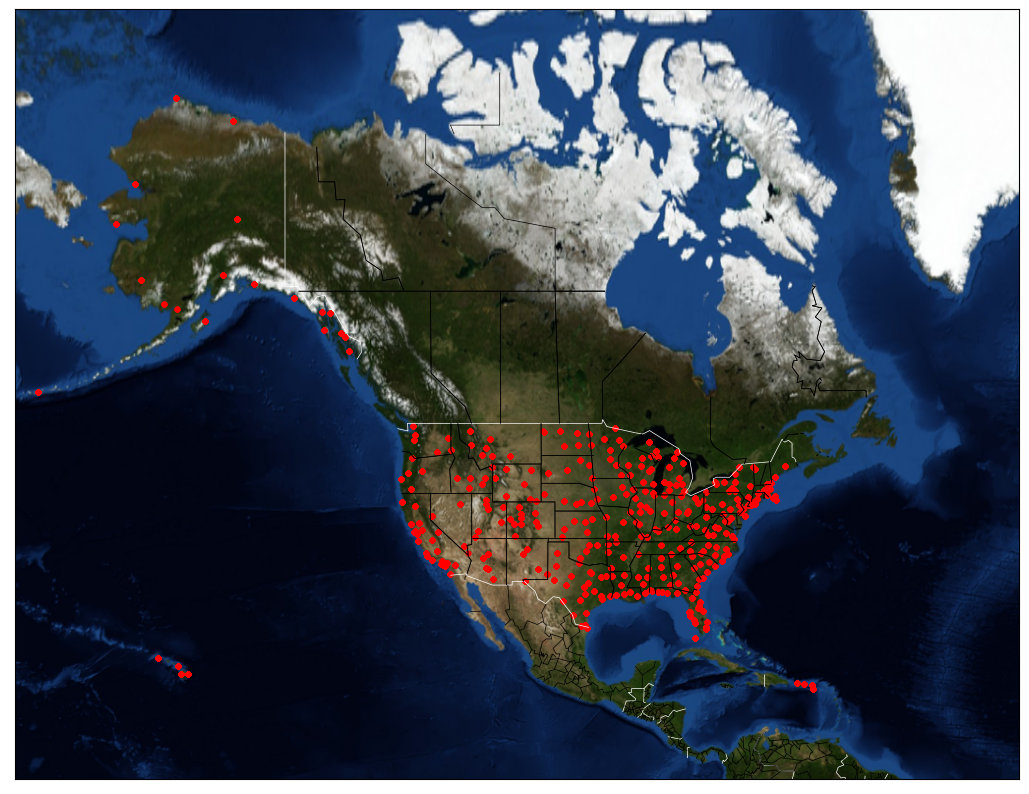

In [40]:
fig = plt.gcf()
fig.set_size_inches(20, 10)

m = Basemap(projection='merc', \
            llcrnrlat=5, urcrnrlat=75, \
            llcrnrlon=-180, urcrnrlon=-35, \
            lat_ts=20, \
            resolution='c')

# m.readshapefile('st99_d00', name='states', drawbounds=True)

# if we don't want to use shapefile, we can draw it on a nice "realistic" map
m.bluemarble(scale=0.5)   # full scale will be overkill
m.drawcountries(color='white')
m.drawstates()

x, y = m(df['long'], df['lat'])
plt.scatter(x, y, 10, marker='o', color='Red')
plt.show()

## Task 5: Display the number of diverted flights for each carrier-airport pair.

In [31]:
df.query("airport == 'ABE' & carrier == 'G4'")

,date,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,...,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,date_as_datetime,lat,long
25891,2018-1,G4,Allegiant Air,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",59.0,13.0,3.69,0.00,2.36,...,0.0,711.0,253.0,0.0,52.0,0.0,406.0,2018-01-01,40.654722,-75.438333
25897,2018-2,G4,Allegiant Air,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",67.0,12.0,5.54,1.00,2.32,...,1.0,854.0,378.0,48.0,153.0,0.0,275.0,2018-02-01,40.654722,-75.438333
25901,2018-3,G4,Allegiant Air,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",92.0,21.0,7.63,0.88,7.57,...,0.0,1670.0,1138.0,15.0,176.0,0.0,341.0,2018-03-01,40.654722,-75.438333
25907,2018-4,G4,Allegiant Air,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",81.0,11.0,3.64,0.48,3.15,...,1.0,514.0,92.0,31.0,190.0,8.0,193.0,2018-04-01,40.654722,-75.438333
25913,2018-5,G4,Allegiant Air,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",82.0,13.0,4.31,0.88,2.51,...,0.0,833.0,199.0,42.0,180.0,0.0,412.0,2018-05-01,40.654722,-75.438333
25919,2018-6,G4,Allegiant Air,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",94.0,25.0,8.38,1.42,9.36,...,0.0,1448.0,664.0,109.0,320.0,0.0,355.0,2018-06-01,40.654722,-75.438333
25924,2018-7,G4,Allegiant Air,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",95.0,29.0,9.27,3.02,7.40,...,2.0,2078.0,708.0,391.0,360.0,0.0,619.0,2018-07-01,40.654722,-75.438333
25932,2018-8,G4,Allegiant Air,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",95.0,23.0,7.77,7.06,3.24,...,1.0,2343.0,1200.0,609.0,165.0,0.0,369.0,2018-08-01,40.654722,-75.438333
25933,2018-9,G4,Allegiant Air,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",53.0,6.0,0.92,1.81,3.27,...,2.0,231.0,67.0,32.0,132.0,0.0,0.0,2018-09-01,40.654722,-75.438333
25941,2018-10,G4,Allegiant Air,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",69.0,8.0,4.98,0.00,0.90,...,0.0,890.0,203.0,0.0,28.0,0.0,659.0,2018-10-01,40.654722,-75.438333


In [32]:
# solution inspired by the provided solution notebook using cross table (contingency table)
pd.crosstab(index=df['airport'], columns=df['carrier'], values=df['arr_diverted'], aggfunc='sum').fillna('')

carrier,9E,AA,AS,B6,DL,EV,F9,G4,HA,MQ,NK,OH,OO,UA,VX,WN,YV,YX
airport,,,,,,,,,,,,,,,,,,
ABE,1.0,,,,3.0,5.0,,9.0,,1.0,,3.0,5.0,,,,,
ABI,,,,,,,,,,8.0,,,,,,,,
ABQ,,8.0,0.0,2.0,0.0,3.0,0.0,0.0,,1.0,,,15.0,2.0,,40.0,12.0,0.0
ABR,,,,,,,,,,,,,7.0,,,,,
ABY,3.0,,,,,,,,,,,,9.0,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WYS,,,,,,,,,,,,,8.0,,,,,
XNA,10.0,1.0,,,3.0,9.0,0.0,2.0,,15.0,,5.0,7.0,,,,1.0,4.0
XWA,,,,,,,,,,,,,5.0,,,,,


In [33]:
df.groupby(['airport', 'carrier']).agg({'arr_diverted': 'sum'})

arr_diverted
airport carrier              
ABE     9E                1.0
        DL                3.0
        EV                5.0
        G4                9.0
        MQ                1.0
...                       ...
XNA     YV                1.0
        YX                4.0
XWA     OO                5.0
YAK     AS               23.0
YNG     G4                0.0

[2081 rows x 1 columns]

## Task 6: Display how many arrivals into JFK in 2019 encountered both weather and carrier delays?

In [34]:
min_date = '2019-01-01'
max_date = '2019-12-31'
# first we create a new df that satisfies our conditions (2019, JFK, some carrier or weather delays)
df_6 = df.query('( carrier_ct != 0 | weather_ct != 0  ) & airport == "JFK" & date_as_datetime <= @max_date & date_as_datetime > @min_date')[['date_as_datetime', 'airport', 'carrier_ct', 'weather_ct']]
# now we sum the two columns together and create a new column
df_6['sum_weather_carrier'] = df_6['weather_ct'] + df_6['carrier_ct']
df_6

,date_as_datetime,airport,carrier_ct,weather_ct,sum_weather_carrier
9600,2019-02-01,JFK,44.87,4.67,49.54
9601,2019-02-01,JFK,84.43,5.46,89.89
9602,2019-02-01,JFK,20.53,3.43,23.96
9603,2019-02-01,JFK,239.25,8.09,247.34
9604,2019-02-01,JFK,79.16,15.02,94.18
...,...,...,...,...,...
9698,2019-11-01,JFK,99.28,6.98,106.26
9699,2019-11-01,JFK,9.48,0.52,10.00
9700,2019-11-01,JFK,13.31,0.94,14.25
9701,2019-11-01,JFK,10.74,1.23,11.97


## Task 7: Display the airline with the most flight cancellations as a percentage of total arriving flights.

In [35]:
# create a dataset that contains carrier, total number of flights, total number of cancelled flights
df_7 = df.groupby(['carrier']).agg({'arr_cancelled': 'sum', 'arr_flights': 'sum'})

# calculate percentage that cancelled flights make (out of total flights)
df_7['cancelled_percentage'] = df_7['arr_cancelled'] / df_7['arr_flights'] * 100

# sort from largest percentage cancellation
df_7.sort_values(['cancelled_percentage'], ascending=False, inplace=True)

# show the first one
df_7.head(10)

,arr_cancelled,arr_flights,cancelled_percentage
carrier,,,
MQ,22065.0,622393.0,3.545188
EV,11734.0,336973.0,3.482178
OH,18677.0,567327.0,3.292105
YV,12218.0,442449.0,2.761448
YX,17644.0,642187.0,2.747486
VX,432.0,17490.0,2.469983
9E,10598.0,502770.0,2.107922
WN,51790.0,2704925.0,1.914656
AA,34897.0,1845346.0,1.891082


In [36]:
df.query('carrier == "9E"').sum(numeric_only=True)

arr_flights            5.027700e+05
arr_del15              8.819900e+04
carrier_ct             2.077362e+04
weather_ct             3.143920e+03
nas_ct                 2.996190e+04
security_ct            3.193000e+01
late_aircraft_ct       3.428779e+04
arr_cancelled          1.059800e+04
arr_diverted           1.086000e+03
arr_delay              6.931947e+06
carrier_delay          1.793289e+06
weather_delay          4.670140e+05
nas_delay              1.874119e+06
security_delay         1.710000e+03
late_aircraft_delay    2.795815e+06
lat                    9.355890e+04
long                  -2.088459e+05
dtype: float64

## Task 8: Determine the overall average number of delays per airport

In [37]:
# first, we calculate total number of delays, then we divide them by number of airports
avg_delays_of_airport = df['arr_del15'].sum() / len(df['airport'].drop_duplicates().index)
print('Average number of delays of one airport: ' + str(avg_delays_of_airport))

Average number of delays of one airport: 7559.141666666666


## Task 9: Display the three carriers with the lowest number of delayed flights.

In [38]:
df.groupby(by='carrier').agg({'arr_del15': 'sum'}).sort_values(by='arr_del15').head(3)

,arr_del15
carrier,
VX,3392.0
HA,10964.0
G4,42648.0


## Task 10: Request that the user input an airline. Then plot the monthly number of national air system (NAS) delay minutes for that airline. Display whether the trend is increasing or decreasing over the last 2 months.

In [42]:
carrier_input = input('Please enter a carrier code (2 characters):')
pattern = re.compile(r"^\w\w$")
if not pattern.match(carrier_input):
    raise ValueError('Wrong format of carrier code inserted.')
df_10 = df.query('carrier == @carrier_input')
if len(df_10.index) == 0:
    raise ValueError('Carrier not found.')

In [43]:
df_10 = df_10.groupby('date_as_datetime').agg({'nas_delay': 'sum'})

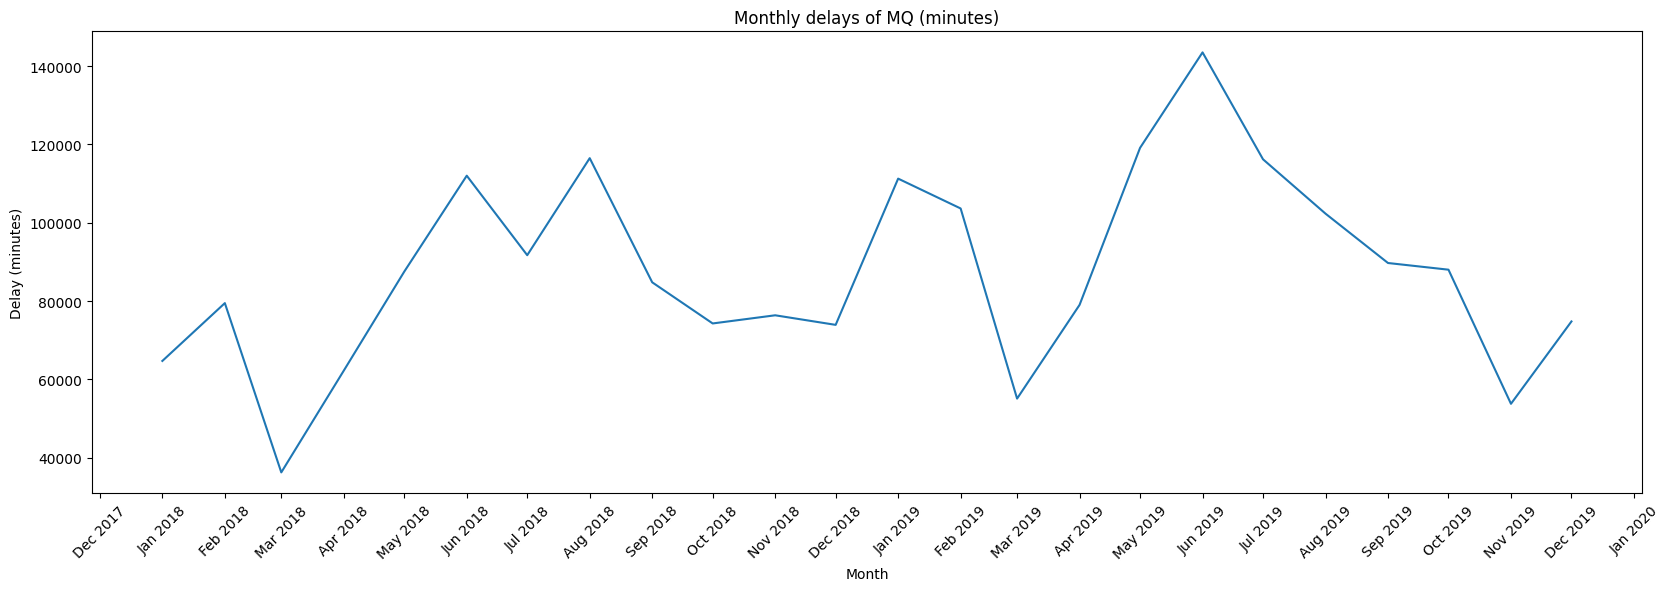

In [44]:
plt.figure(figsize=(20, 6))
plt.plot(df_10)

plt.title(f'Monthly delays of {carrier_input} (minutes)')
plt.ylabel(f"Delay (minutes)")
plt.xlabel('Month')

# Configure the x-axis to show every month
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.show()

In [ ]:
second_last = int(df_10.tail(2).head(1)['nas_delay'])
last = int(df_10.tail(1)['nas_delay'])
if second_last < last:
    print(f"For the last two months, the trend is increasing.")
elif second_last > last:
    print("For the last two months, the trend is decreasing.")
else:
    print(f"For the last two months, the values are equal.")